In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as linear
from sklearn.preprocessing import PolynomialFeatures
from tqdm.notebook import tqdm

In [5]:
data = pd.read_csv('cardio_train.csv', sep=';')

In [6]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Regression

In [238]:
weight = data['weight'].values
bp = data['ap_hi'].values

In [10]:
weight, bp

(array([ 62.,  85.,  64., ..., 105.,  72.,  72.]),
 array([110, 140, 130, ..., 180, 135, 120]))

In [209]:
n_samples = 10
n_samples_test = 5
X_train = np.expand_dims(weight[:n_samples],axis=-1)
Y_train = bp[:n_samples]
X_test = np.expand_dims(weight[n_samples:n_samples+n_samples_test],axis=-1)
Y_test = bp[n_samples:n_samples + n_samples_test]
X_train, Y_train, X_test, Y_test

(array([[62.],
        [85.],
        [64.],
        [82.],
        [56.],
        [67.],
        [93.],
        [95.],
        [71.],
        [68.]]),
 array([110, 140, 130, 150, 100, 120, 130, 130, 110, 110]),
 array([[80.],
        [60.],
        [60.],
        [78.],
        [95.]]),
 array([120, 120, 120, 110, 130]))

In [210]:
deg = 3
poly_features = PolynomialFeatures(degree=deg)
X_poly = poly_features.fit_transform(X_train)

In [211]:
model = linear.LinearRegression()
model.fit(X_poly,Y_train)

LinearRegression()

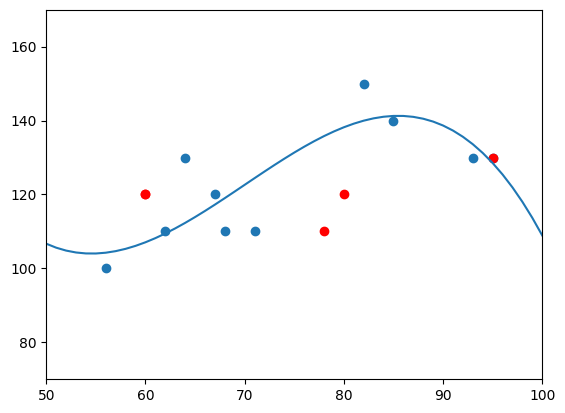

In [212]:
x = np.arange(50,101)
y = model.intercept_
for i in range(len(model.coef_)):
    y += model.coef_[i]*x**(i)
plt.plot(x, y)
plt.scatter(X_train, Y_train)
plt.xlim(50,100)
plt.ylim(70,170)
plt.scatter(X_test, Y_test, c='r')

## How to use validation set to tune hyperparameters

In [226]:
n_samples_train = 2000
n_samples_val = 500
n_samples_test = 500
X_train = np.expand_dims(weight[:n_samples_train],axis=-1)
Y_train = bp[:n_samples_train]
X_val = np.expand_dims(weight[n_samples_train:n_samples_train+n_samples_val],axis=-1)
Y_val = bp[n_samples_train:n_samples_train + n_samples_val]
X_test = np.expand_dims(weight[n_samples_train+n_samples_val:n_samples_train+n_samples_val+n_samples_test],axis=-1)
Y_test = bp[n_samples_train+n_samples_val:n_samples_train+n_samples_val+n_samples_test]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((2000, 1), (2000,), (500, 1), (500,), (500, 1), (500,))

In [237]:
degrees = [3,4,5,6,7,8]
reg_factors = [0.001,0.0001,0.00001]
best_score = -np.inf
for deg in degrees:
    for reg in reg_factors:
        poly_features = PolynomialFeatures(degree=deg)
        X_train_poly = poly_features.fit_transform(X_train)
        X_val_poly = poly_features.fit_transform(X_val)
        model = linear.Ridge(alpha=reg)
        model.fit(X_train_poly,Y_train)
        score = model.score(X_val_poly,Y_val)
        if score > best_score:
            best_score = score
            best_deg = deg
            best_reg = reg

best_score, best_deg, best_reg

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.67873e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.67873e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.67873e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.634e-22): result may not be accur

(0.006830864961432148, 6, 1e-05)